# Part I - (Dataset Exploration - Loan Data from Prosper)
## by (Noura)

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

<h4>After exploring the documentation, these features can be more important in this exploration.</h4>
    
Term: The length of the loan expressed in months.

LoanStatus:	The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan.

BorrowerRate: The Borrower's interest rate for this loan. 

ProsperRating (numeric): The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.

ProsperRating (Alpha): The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.

ProsperScore: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.

ListingCategory: The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans.

EmploymentStatus: The employment status of the borrower at the time they posted the listing.

IsBorrowerHomeowner: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.

CurrentlyInGroup: Specifies whether or not the Borrower was in a group at the time the listing was created.

IncomeRange: The income range of the borrower at the time the listing was created.

IncomeVerifiable: The borrower indicated they have the required documentation to support their income.

StatedMonthlyIncome: The monthly income the borrower stated at the time the listing was created.

Recommendations: Number of recommendations the borrower had at the time the listing was created.

InvestmentFromFriendsCount: Number of friends that made an investment in the loan.

Investors: The number of investors that funded the loan.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
loan_df = pd.read_csv('prosperLoanData.csv')
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
print('Rows: ', loan_df.shape[0])
print('Columns: ', loan_df.shape[1])

Rows:  113937
Columns:  81


In [4]:
# Subset the dataframe by selecting features of interest

cols = ['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 
'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore', 
'ListingCategory (numeric)', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentlyInGroup',
'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 'Recommendations', 
'InvestmentFromFriendsCount', 'Investors']

loan_df = loan_df[cols]

In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
Term                          113937 non-null int64
LoanStatus                    113937 non-null object
BorrowerAPR                   113912 non-null float64
BorrowerRate                  113937 non-null float64
ProsperRating (numeric)       84853 non-null float64
ProsperRating (Alpha)         84853 non-null object
ProsperScore                  84853 non-null float64
ListingCategory (numeric)     113937 non-null int64
EmploymentStatus              111682 non-null object
IsBorrowerHomeowner           113937 non-null bool
CurrentlyInGroup              113937 non-null bool
IncomeRange                   113937 non-null object
IncomeVerifiable              113937 non-null bool
StatedMonthlyIncome           113937 non-null float64
Recommendations               113937 non-null int64
InvestmentFromFriendsCount    113937 non-null int64
Investors                     113937 non-null int

In [6]:
loan_df.describe()

,Term,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),StatedMonthlyIncome,Recommendations,InvestmentFromFriendsCount,Investors
count,113937.000000,113912.000000,113937.000000,84853.000000,84853.000000,113937.000000,1.139370e+05,113937.000000,113937.000000,113937.000000
mean,40.830248,0.218828,0.192764,4.072243,5.950067,2.774209,5.608026e+03,0.048027,0.023460,80.475228
std,10.436212,0.080364,0.074818,1.673227,2.376501,3.996797,7.478497e+03,0.332353,0.232412,103.239020
min,12.000000,0.006530,0.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,36.000000,0.156290,0.134000,3.000000,4.000000,1.000000,3.200333e+03,0.000000,0.000000,2.000000
50%,36.000000,0.209760,0.184000,4.000000,6.000000,1.000000,4.666667e+03,0.000000,0.000000,44.000000
75%,36.000000,0.283810,0.250000,5.000000,8.000000,3.000000,6.825000e+03,0.000000,0.000000,115.000000
max,60.000000,0.512290,0.497500,7.000000,11.000000,20.000000,1.750003e+06,39.000000,33.000000,1189.000000


In [7]:
loan_df.isnull().sum()

Term                              0
LoanStatus                        0
BorrowerAPR                      25
BorrowerRate                      0
ProsperRating (numeric)       29084
ProsperRating (Alpha)         29084
ProsperScore                  29084
ListingCategory (numeric)         0
EmploymentStatus               2255
IsBorrowerHomeowner               0
CurrentlyInGroup                  0
IncomeRange                       0
IncomeVerifiable                  0
StatedMonthlyIncome               0
Recommendations                   0
InvestmentFromFriendsCount        0
Investors                         0
dtype: int64

In [8]:
loan_df.duplicated().sum()

1208

In [9]:
# records with null BorrowerAPR need to be removed
loan_df = loan_df[~loan_df.BorrowerAPR.isna()]

### What is the structure of your dataset?

> There are 113937 loan records in this dataset with 81 features.

> 61 variables are numeric.

> 17 features only were included for this exploration.

### What is/are the main feature(s) of interest in your dataset?

> LoanStatus, ProsperRating (numeric), ProsperRating (Alpha), ProsperScore, EmploymentStatus, IsBorrowerHomeowner,  Recommendations, InvestmentFromFriendsCount.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Term, BorrowerAPR, BorrowerRate, ListingCategory (numeric), CurrentlyInGroup, IncomeRange, IncomeVerifiable, StatedMonthlyIncome, Investors.

**Plot Functions for repetition abbreviation**

In [10]:
def plot_hist(data, x, x_label, title, bins):
    plt.hist(data = data, x = x, bins = bins);
    plt.xlabel(x_label)
    plt.title(title);

In [11]:
def plot_count(xticks=0, xlabel='', ylabel='', title='', legend=0, **kwargs):
    sb.countplot(**kwargs);
    
    if xticks:
        plt.xticks(rotation=xticks)
    if xlabel:    
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if title:
        plt.title(title)
    if legend:
        plt.legend(bbox_to_anchor=legend) 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

**What is the distribution of BorrowerAPR?**

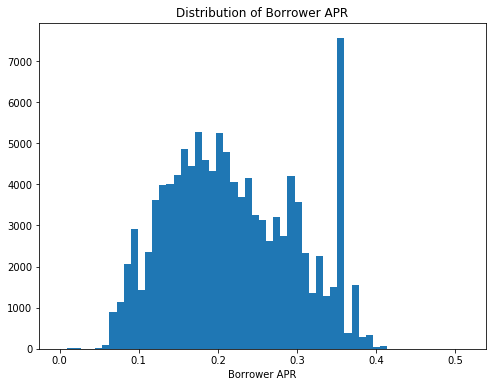

In [12]:
# from min to max vals
bins = np.arange(0, loan_df.BorrowerAPR.max()+0.009, 0.009)

plt.figure(figsize=[8, 6])
# plot_hist(data, x, x_label, title, bins)
plot_hist(loan_df, 'BorrowerAPR', 'Borrower APR', 'Distribution of Borrower APR', bins)

**The distribution of APR looks multimodal with many peaks at different places. Most of the loans have APR between 0.05 and 0.4.**

<hr style="border:2px solid gray">

**What is the distribution of StatedMonthlyIncome?**

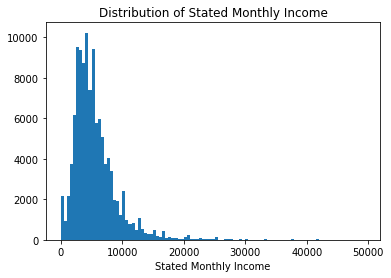

In [13]:
# not from min to max vals 1750003
# choose other upper limit

bins = np.arange(0, 50000, 500)

# plot_hist(data, x, x_label, title, bins)
plot_hist(loan_df, 'StatedMonthlyIncome', 'Stated Monthly Income', 
          'Distribution of Stated Monthly Income', bins)

# plt.xscale('log')

**The distribution of StatedMonthlyIncome is right screwed, with most of the values less than 20k.**

<hr style="border:2px solid gray">

**What is the distribution of LoanStatus values?**

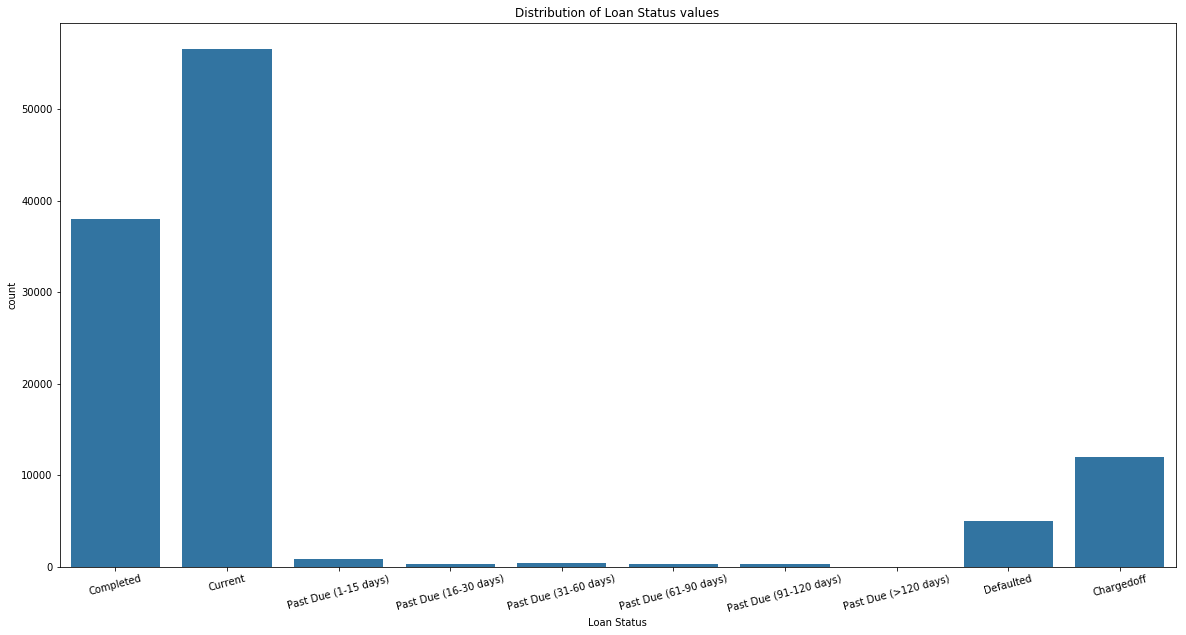

In [14]:
plt.figure(figsize=(20, 10));
b_color=sb.color_palette()[0]

# ordinal data
loan_order = ['Completed', 'Current', 'Past Due (1-15 days)', 'Past Due (16-30 days)', 
'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 
'Past Due (>120 days)', 'Defaulted', 'Chargedoff']

# plot_count(xticks, xlabel, ylabel, title, legend, **kwargs)
plot_count(xticks=15, xlabel='Loan Status', 
           title='Distribution of Loan Status values', 
          x='LoanStatus', data=loan_df, color=b_color, order=loan_order)

**It seems that the current status is the highest. Whatsoever, the completed loans count is higher than the other status values.**

<hr style="border:2px solid gray">

**What are the category of the listing that the borrower selected when posting their listing?**

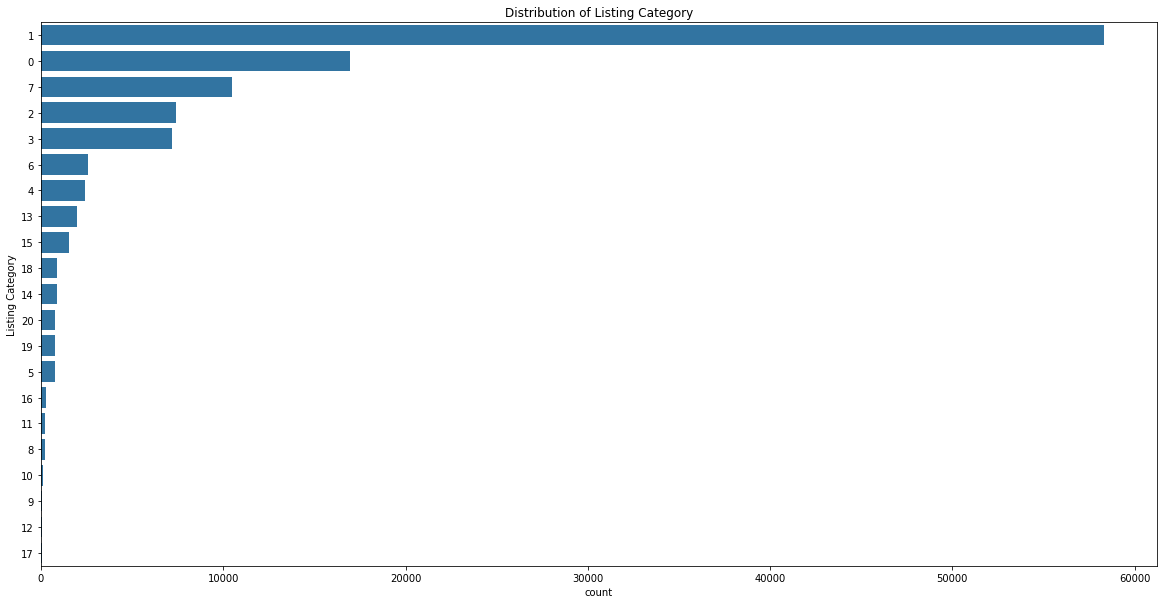

In [15]:
plt.figure(figsize=(20, 10))

# nominal data
order = loan_df['ListingCategory (numeric)'].value_counts().index

# plot_count(xticks, xlabel, ylabel, title, legend, **kwargs)
plot_count(ylabel='Listing Category', title='Distribution of Listing Category', 
           y='ListingCategory (numeric)', data=loan_df, color=b_color, order=order)

In [16]:
loan_df['ListingCategory (numeric)'].dtype

dtype('int64')

In [17]:
# Change Listing category into cagorical variable using the appropriate values obtained from the documentation
categories = ['Not Available', 'Debt Consolidation', 'Home Improvement', 
              'Business', 'Personal Loan', 'Student Use', 'Auto', 'Other', 
              'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 
              'Green Loans', 'Household Expenses', 'Large Purchases', 
              'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 'Vacation', 'Wedding Loans']

loan_df['ListingCategory (numeric)'] = loan_df['ListingCategory (numeric)'].apply(lambda i : categories[i])

# rename the col
loan_df.rename(columns={'ListingCategory (numeric)':'ListingCategory'}, inplace=True)

# check the type
loan_df['ListingCategory'].dtype

dtype('O')

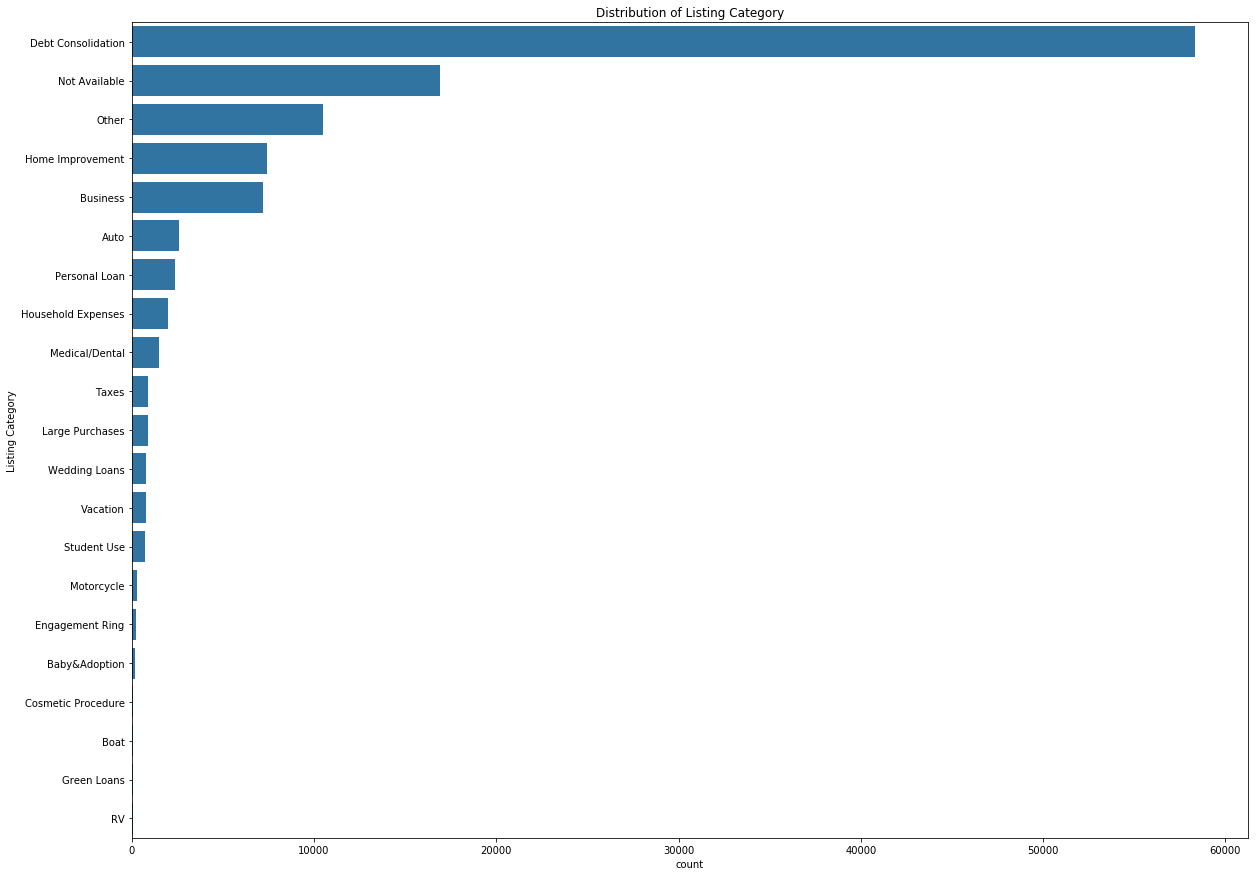

In [18]:
plt.figure(figsize=(20, 15))

# nominal data
order = loan_df.ListingCategory.value_counts().index

# plot_count(xticks, xlabel, ylabel, title, legend, **kwargs)
plot_count(ylabel='Listing Category', title='Distribution of Listing Category', 
           y='ListingCategory', data=loan_df, color=b_color, order=order)

**Debt Consolidation is the Listing Category with the highest value.**

<hr style="border:2px solid gray">

**What is the data distribution regarding EmploymentStatus?**

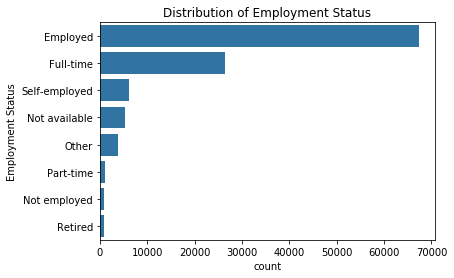

In [19]:
# nominal data
emp_order = loan_df.EmploymentStatus.value_counts().index

# plot_count(xticks, xlabel, ylabel, title, legend, **kwargs)
plot_count(ylabel='Employment Status', title='Distribution of Employment Status', 
           y='EmploymentStatus', data =loan_df, color= b_color, order=emp_order)

**The Employed status is the most, wheras Retired is the least.**

<hr style="border:2px solid gray">

**Is Borrower Homeowner?**

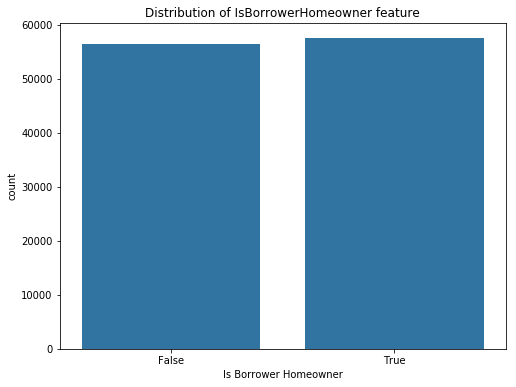

In [20]:
plt.figure(figsize=(8, 6))

# plot_count(xticks, xlabel, ylabel, title, legend, **kwargs)
plot_count(xlabel='Is Borrower Homeowner', title='Distribution of IsBorrowerHomeowner feature', 
           x='IsBorrowerHomeowner', data=loan_df, color=b_color)

**Majority of the people granted loans are Homeowners.**

<hr style="border:2px solid gray">

**How many borrowers are Currently In Group?**

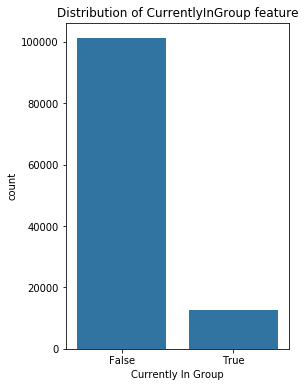

In [21]:
plt.figure(figsize=(4, 6))

# plot_count(xticks, xlabel, ylabel, title, legend, **kwargs)
plot_count(xlabel='Currently In Group', title='Distribution of CurrentlyInGroup feature', 
           x='CurrentlyInGroup', data=loan_df, color=b_color)

**Most of the borrowers do not belong to any group.**

<hr style="border:2px solid gray">

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There were no unusual points noticed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The listingcategory values were converted into cagorical variable based on values obtained from the dataset documentation.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [22]:
numeric_vars= ['Term', 'BorrowerAPR', 'BorrowerRate', 
                'ProsperRating (numeric)', 'ProsperScore', 
                'StatedMonthlyIncome', 'Recommendations', 
                'InvestmentFromFriendsCount', 'Investors']

cat_vars = ['LoanStatus', 'ProsperRating (Alpha)', 
            'ListingCategory', 'EmploymentStatus', 
            'IsBorrowerHomeowner', 'CurrentlyInGroup', 
            'IncomeRange', 'IncomeVerifiable']

**How is the relationship between the numeric values of interest?**

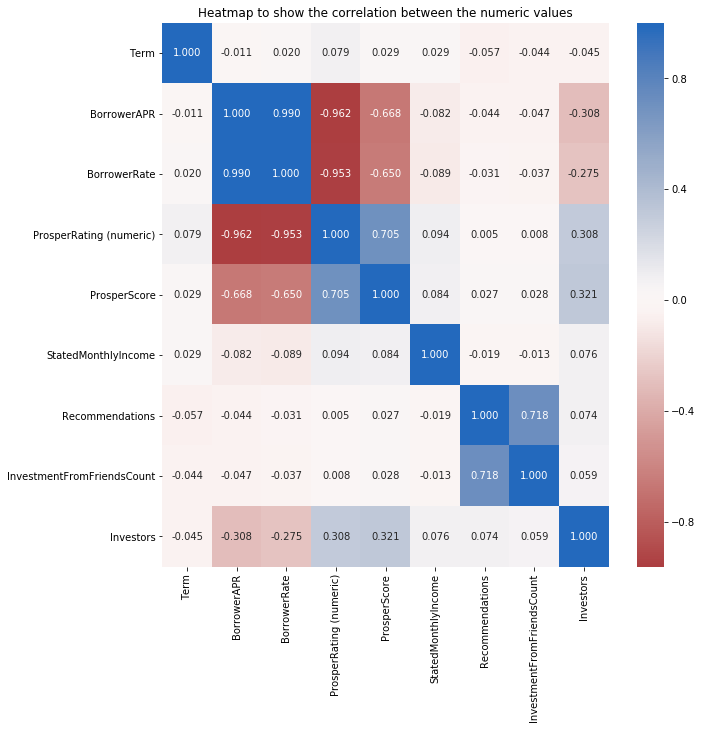

In [23]:
# heatmap of correlation between numeric vars
plt.figure(figsize = [10, 10])
sb.heatmap(loan_df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)

plt.title('Heatmap to show the correlation between the numeric values');

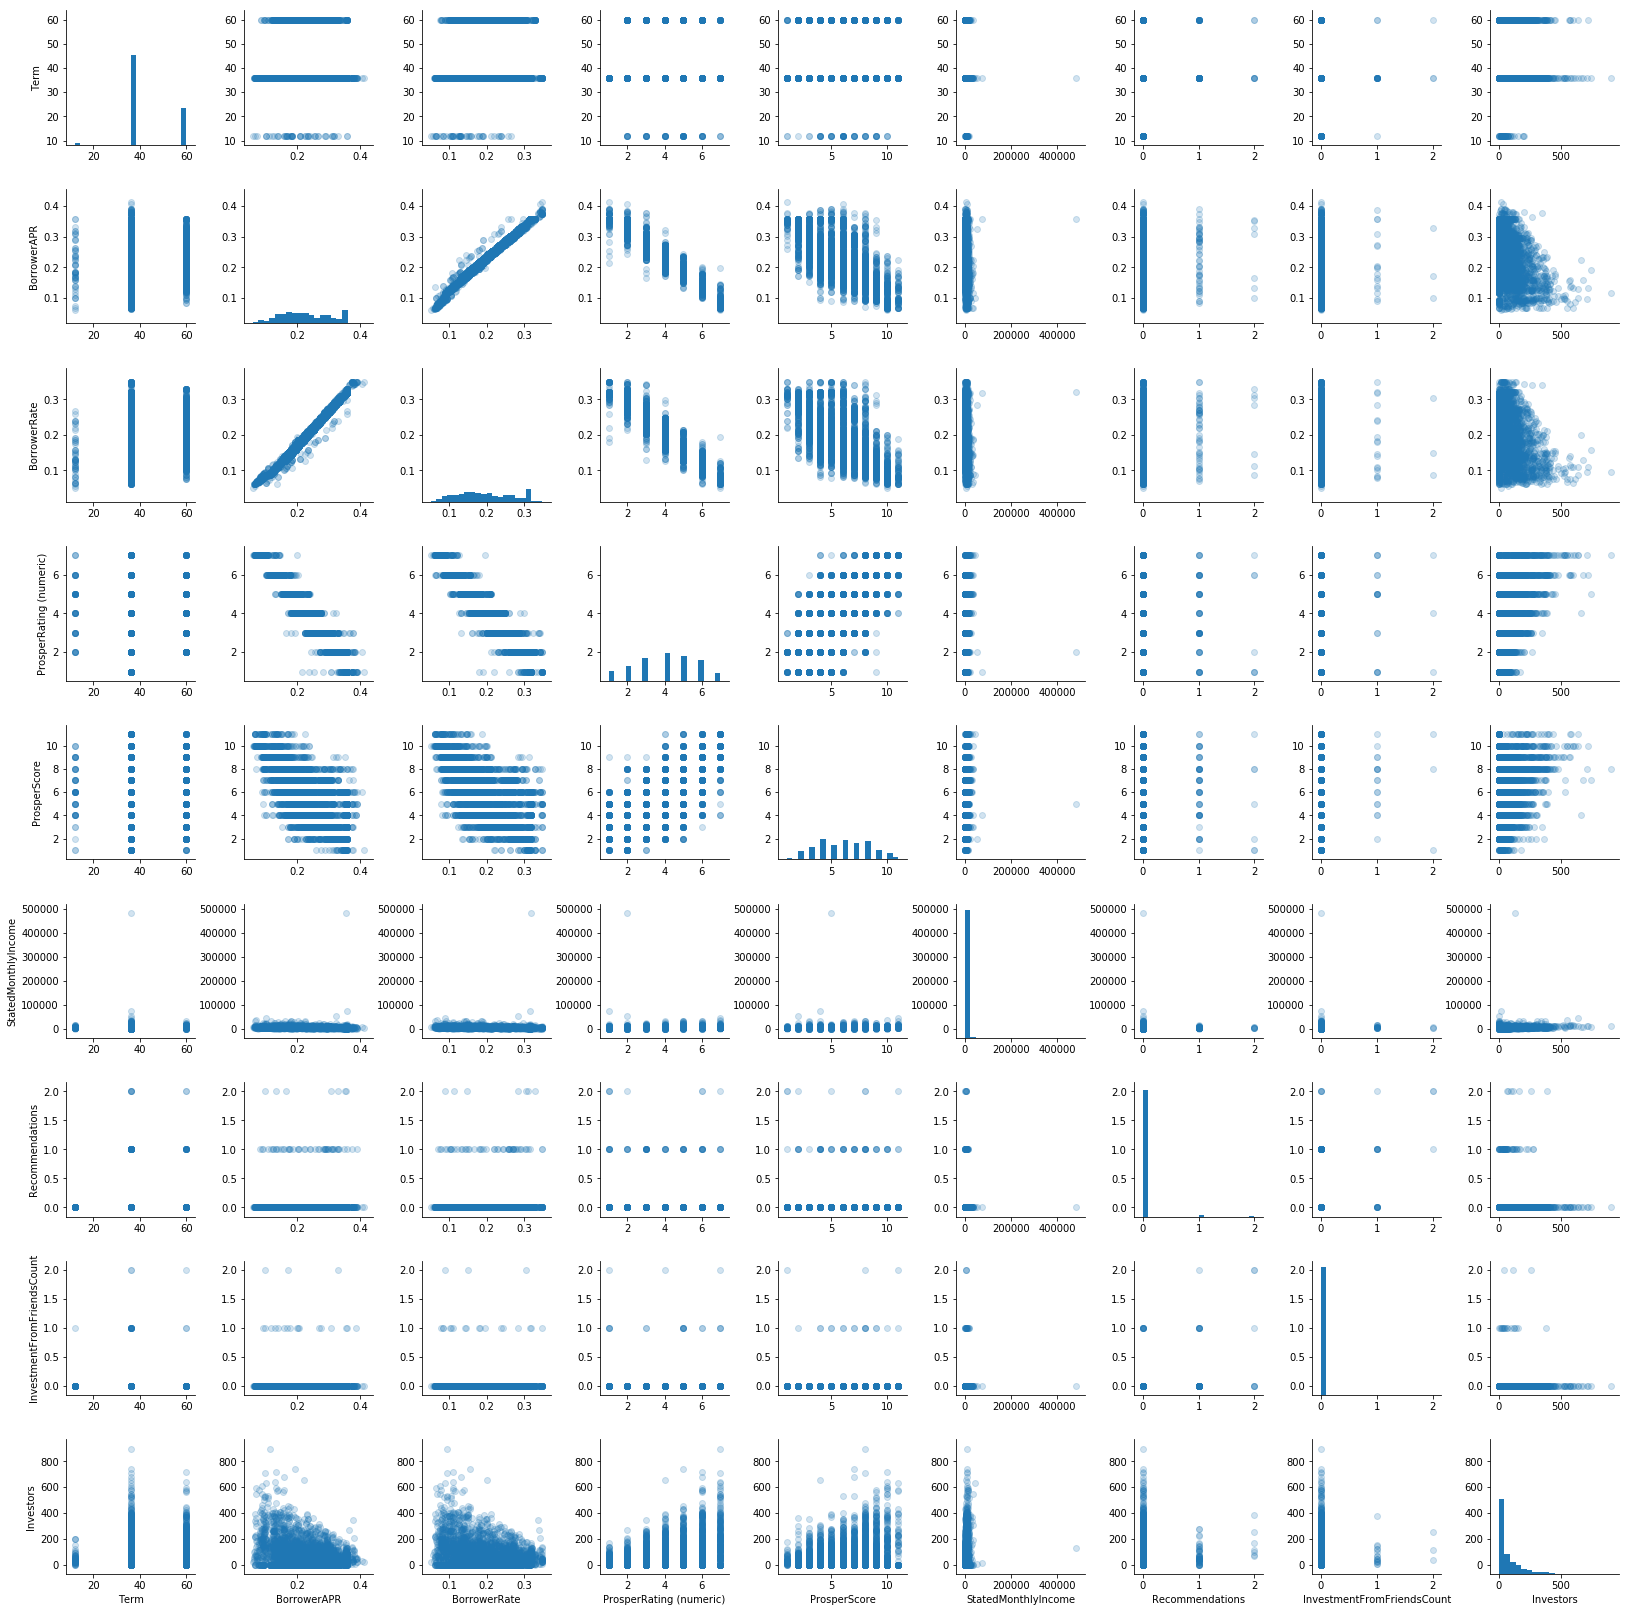

In [24]:
# take sample 5000 loans so we can get more clear plots

loan_df_sample = loan_df.sample(5000)
g = sb.PairGrid(data = loan_df_sample.dropna(), vars = numeric_vars)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha=0.2);

<b>
    
BorrowerAPR & BorrowerRate +corr

BorrowerAPR & ProsperRating (numeric) -corr

BorrowerAPR & ProsperScore -corr

ProsperRating (numeric) & ProsperScore +corr

ProsperRating (numeric) & BorrowerRate -corr

ProsperScore & BorrowerRate -corr

Recommendation & InvestmentFromFriendsCount +corr

Investors & ProsperScore +corr

Investors & ProsperRating (numeric) +corr

Investors & BorrowerAPR -corr

Investors & BorrowerRate -corr

</b>

<hr style="border:2px solid gray">

**If we fit a line in relation between Investors and ProsperScore, how would it be?**

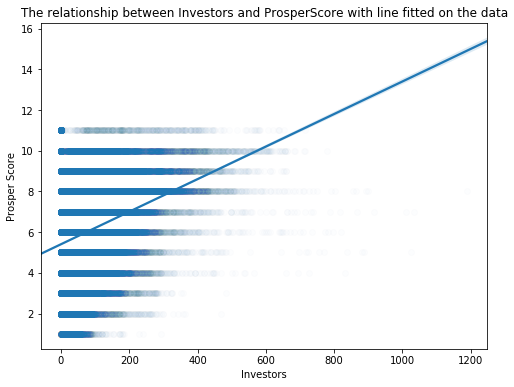

In [25]:
plt.figure(figsize = [8, 6])
sb.regplot(data = loan_df, x = 'Investors', y = 'ProsperScore', scatter_kws={'alpha':0.01})
plt.xlabel('Investors')
plt.ylabel('Prosper Score')
plt.title('The relationship between Investors and ProsperScore with line fitted on the data');

**The fitted line assures the positive correlation between Investors and ProsperScore**

<hr style="border:2px solid gray">

**What is Recommendations distribution per loan status?**

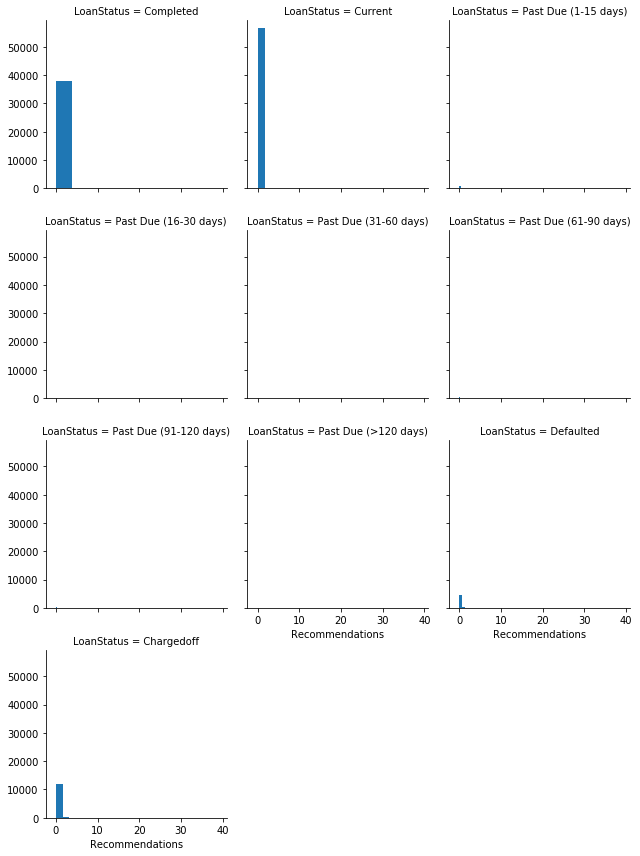

In [26]:
g=sb.FacetGrid(data=loan_df, col='LoanStatus', col_wrap=3, col_order=loan_order)
g.map(plt.hist, 'Recommendations');

**The loans with the Current status have got the highest Recommendations.**

<hr style="border:2px solid gray">

**What is the Investment from friends distribution regarding the loan status?**

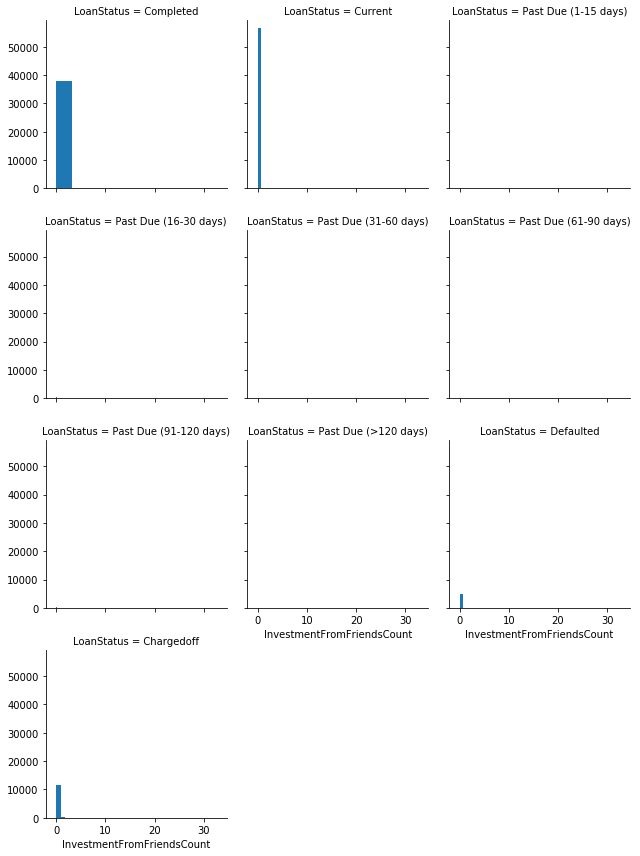

In [27]:
g = sb.FacetGrid(data = loan_df, col = 'LoanStatus', col_wrap = 3, col_order=loan_order)
g.map(plt.hist, 'InvestmentFromFriendsCount');

**There are more Current and Completed loans with investment from friends count.**

<hr style="border:2px solid gray">

**What is the ProsperScore distribution per loan status?**

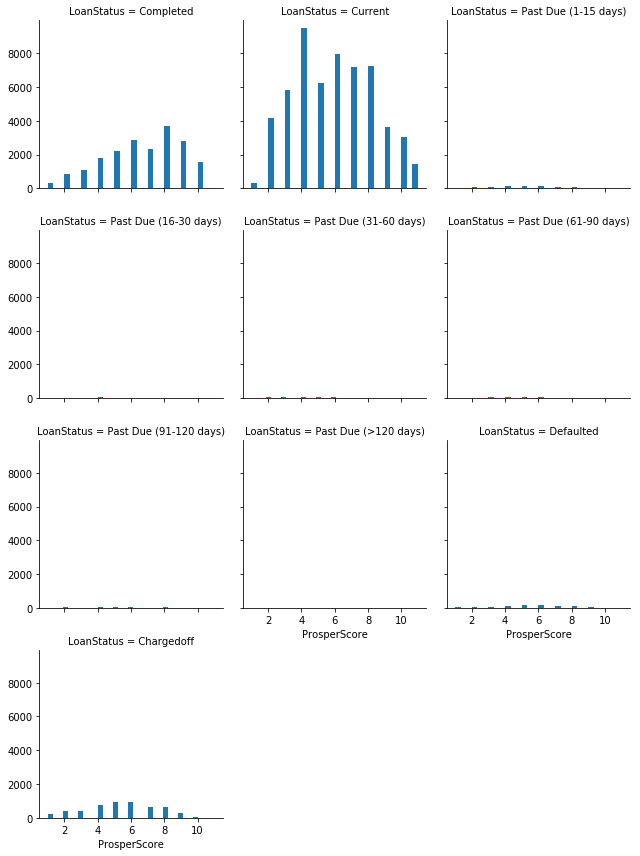

In [28]:
g=sb.FacetGrid(data=loan_df, col='LoanStatus', col_wrap=3, col_order=loan_order)
g.map(plt.hist, 'ProsperScore', bins=30);

**There are more Current and Completed loans with Higher ProsperScore.**

<hr style="border:2px solid gray">

**What is the Employent status distribution per loan status?**

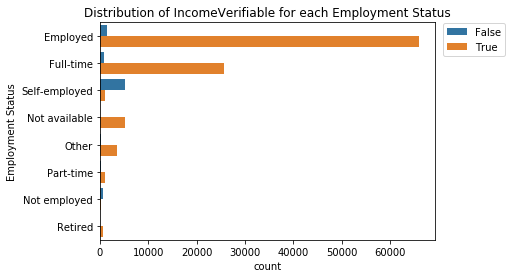

In [29]:
# plot_count(xticks, xlabel, ylabel, title, legend, **kwargs)
plot_count(ylabel='Employment Status', 
           title='Distribution of IncomeVerifiable for each Employment Status', 
           legend=(1.01, 1.02), 
           data=loan_df, hue='IncomeVerifiable', 
            y='EmploymentStatus', orient='v', order=emp_order)

**High IncomeVerifiable count with Employed status.**

<hr style="border:2px solid gray">

<h2> what is the relationship between loan status and IsBorrowerHomeowner

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There are positive and negative correlations between some of the numerical values:
BorrowerAPR & BorrowerRate +corr

> BorrowerAPR & BorrowerRate +corr

> BorrowerAPR & ProsperRating (numeric) -corr

> BorrowerAPR & ProsperScore -corr

> ProsperRating (numeric) & ProsperScore +corr

> ProsperRating (numeric) & BorrowerRate -corr

> ProsperScore & BorrowerRate -corr

> Recommendation & InvestmentFromFriendsCount +corr

> Investors & ProsperScore +corr

> Investors & ProsperRating (numeric) +corr

> Investors & BorrowerAPR -corr

> Investors & BorrowerRate -corr

> The loans with the Current and Completed status have got the highest Recommendations.

> There are more Current and Completed loans with investment from friends count.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There are more Current and Completed loans with Higher ProsperScore.

> High IncomeVerifiable count with Employed status.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

**What is the Term effect on the relationship between BorrowerAPR and ProsperScore?**

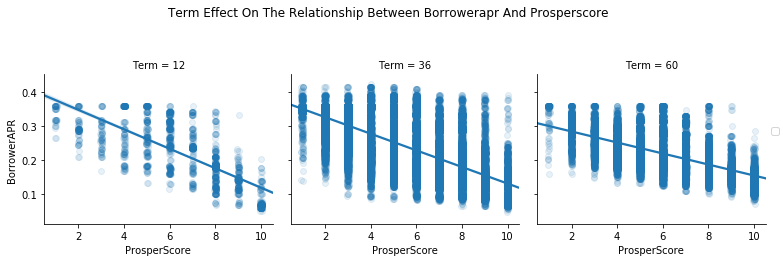

In [30]:
g=sb.FacetGrid(data=loan_df, aspect=1.2, col='Term', col_wrap=3)
g.map(sb.regplot, 'ProsperScore', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend()
plt.suptitle("Term effect on the relationship between BorrowerAPR and ProsperScore".title(), 
             y = 1.2);

**Appearantly, Term doesn't have effect on the relationship between BorrowerAPR and ProsperScore.**

<hr style="border:2px solid gray">

**What is the ProsperRating (Alpha) effect on the relationship between Investors and ProsperScore?**

In [31]:
# Convert ProsperRating (Alpha) into ordered categorical types
rate_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']

ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
loan_df['ProsperRating (Alpha)'] = loan_df['ProsperRating (Alpha)'].astype(ordered_var)

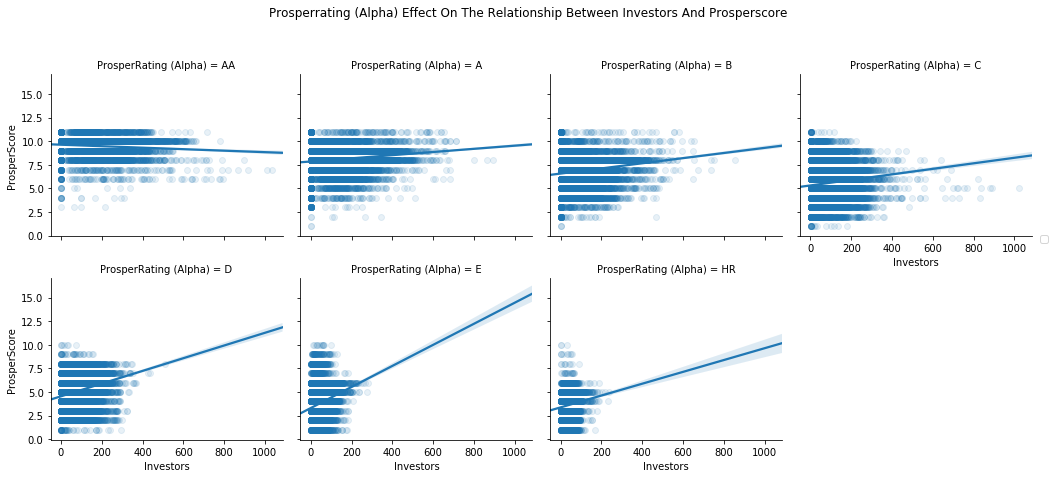

In [32]:
g=sb.FacetGrid(data=loan_df, aspect=1.2, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sb.regplot, 'Investors', 'ProsperScore', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend()
plt.suptitle("ProsperRating (Alpha) effect on the relationship between Investors and ProsperScore".title(), 
             y = 1.1);

**The positive correlation between Investors and ProsperScore tends to be strengthen as the ProsperRating (Alpha) increases.**

<hr style="border:2px solid gray">

**What is the InvestmentFromFriendsCount effect on the relationship between IsBorrowerHomeowner and Recommendations?**

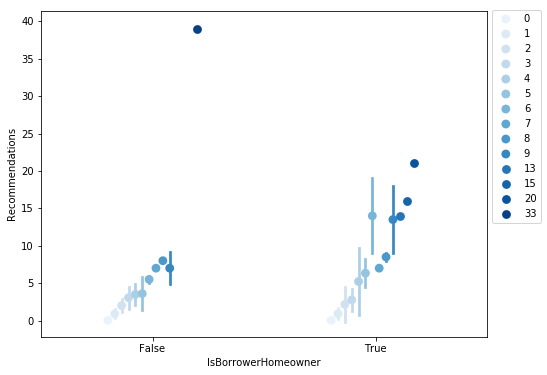

In [33]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loan_df, x = 'IsBorrowerHomeowner', y = 'Recommendations',
                  hue = 'InvestmentFromFriendsCount', palette = 'Blues', 
                  linestyles = '', dodge = 0.4, ci='sd')

plt.legend(loc=(1.01 ,0.35));

**It seems that borrowers who owned homes got more recommendations.**

<hr style="border:2px solid gray">

**What is the effect of the LoanStatus on the relationship between ProsperScore and EmploymentStatus?**

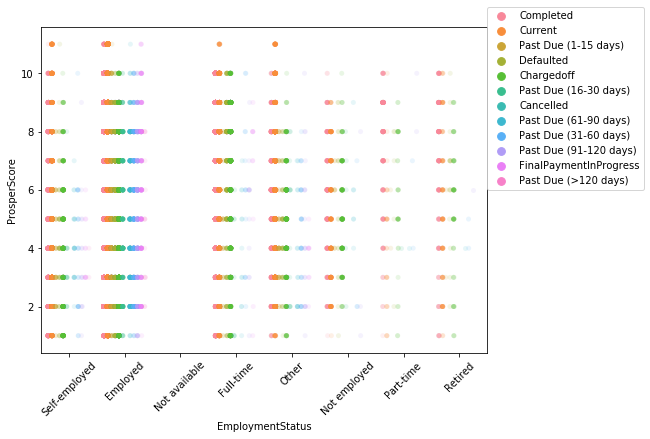

In [34]:
fig, ax = plt.subplots(nrows=1, figsize=(8, 6))
sb.stripplot(data=loan_df, y='ProsperScore', x='EmploymentStatus',
             hue='LoanStatus', jitter=True, ax=ax, dodge= 0.7, alpha=1/8)
plt.xticks(rotation=45)
plt.legend(loc=(1,0.5));

**LoanStatus does not have significant effect on the relationship between ProsperScore and EmploymentStatus.**

<hr style="border:2px solid gray">

**What is the effect of the LoanStatus on the relationship between ProsperScore and IsBorrowerHomeowner?**

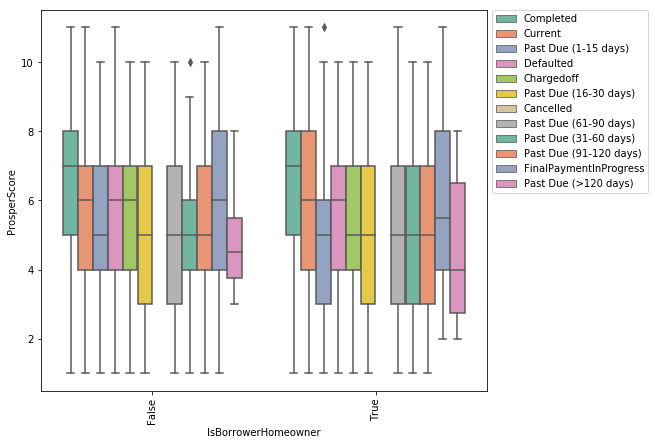

In [35]:
fig, ax=plt.subplots(nrows=1, figsize=(8, 7))
sb.boxplot(data=loan_df, y='ProsperScore', color=b_color, 
           x='IsBorrowerHomeowner', ax=ax, hue='LoanStatus', palette='Set2')
plt.legend(loc=(1.01, 0.52))
plt.xticks(rotation=90);

**It seems that, BorrowerHomeowners with Current and Completed loanStatus have higher ProsperScore.**

<hr style="border:2px solid gray">

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Appearantly, Term doesn't have effect on the relationship between BorrowerAPR and ProsperScore.

> The positive correlation between Investors and ProsperScore tends to be strengthen as the ProsperRating (Alpha) increases.

> It seems that borrowers who owned homes got more recommendations.

> LoanStatus does not have significant effect on the relationship between ProsperScore and EmploymentStatus.

> It seems that, BorrowerHomeowners with Current and Completed loanStatus have higher ProsperScore.



### Were there any interesting or surprising interactions between features?

> It seems that borrowers who owned homes got more recommendations.

> It seems that, BorrowerHomeowners with Current and Completed loanStatus have higher ProsperScore.

## Conclusions

I worked on Loan Data from Prosper. After exploring the documentation, these 17 features can be more important in this exploration: 

LoanStatus, ProsperRating (numeric), ProsperRating (Alpha), ProsperScore, EmploymentStatus, IsBorrowerHomeowner, Recommendations, InvestmentFromFriendsCount, Term, BorrowerAPR, BorrowerRate, ListingCategory (numeric), CurrentlyInGroup, IncomeRange, IncomeVerifiable, StatedMonthlyIncome, Investors.

After that I applied some data wrangling and excluded the unneeded columns. I changed the ListingCategory and ProsperRating (Alpha) into cagorical variable using the appropriate values obtained from the documentation.

**Univariate Exploration Results:**

> The distribution of APR looks multimodal with many peaks at different places. Most of the loans have APR between 0.05 and 0.4.

> The distribution of StatedMonthlyIncome is right screwed, with most of the values less than 20k.

> It seems that the current status is the highest. Whatsoever, the completed loans count is higher than the other status values.

> Debt Consolidation is the Listing Category with the highest value.

> The Employed status is the most, wheras Retired is the least.

> Majority of the people granted loans are Homeowners.

> Most of the borrowers do not belong to any group.

**Bivariate Exploration Results:**

I divided the features into numeric and categorical to ease the process.

> There are positive and negative correlations between some of the numerical values: BorrowerAPR & BorrowerRate +corr

> BorrowerAPR & BorrowerRate +corr

> BorrowerAPR & ProsperRating (numeric) -corr

> BorrowerAPR & ProsperScore -corr

> ProsperRating (numeric) & ProsperScore +corr

> ProsperRating (numeric) & BorrowerRate -corr

> ProsperScore & BorrowerRate -corr

> Recommendation & InvestmentFromFriendsCount +corr

> Investors & ProsperScore +corr

> Investors & ProsperRating (numeric) +corr

> Investors & BorrowerAPR -corr

> Investors & BorrowerRate -corr

> The loans with the Current and Completed status have got the highest Recommendations.

> There are more Current and Completed loans with investment from friends count.

> There are more Current and Completed loans with Higher ProsperScore.

> High IncomeVerifiable count with Employed status.

**Multivariate Exploration Results:**

> Appearantly, Term doesn't have effect on the relationship between BorrowerAPR and ProsperScore.

> The positive correlation between Investors and ProsperScore tends to be strengthen as the ProsperRating (Alpha) increases.

> It seems that borrowers who owned homes got more recommendations.

> LoanStatus does not have significant effect on the relationship between ProsperScore and EmploymentStatus

> It seems that, BorrowerHomeowners with Current and Completed loanStatus have higher ProsperScore.

